# Grey Lines Light Logging Demo

The scene defined for this activity includes:

- the LineTracer robot with a downward facing light sensor;
- a test track comprising three gray lines.

The LineTracer in this scene is instrumented with some simple odometry that tracks the number of rotations of the left wheel.

As the robot runs over the grey lines, we can log the rotation count data and the light sensor data and then display the results on a chart inside the simulator.

We can then use the chart to distinguish the different lines, their location relative to the starting position of the robot, and their widths.

As well as viewing the data in the simulator, we can also retrieve data from the simulator as the simulation runs. This means we can log the sensor data in the control program running from the notebook and then analyse and display the data within code cells elsewhere in the notebook, outside of the simulator context.

In [1]:
%run 'Set-up.ipynb'
%run 'Loading scenes.ipynb'

#The following magic command allows us to embed dynamically created charts in the notebook
%matplotlib inline

In [2]:
%run 'vrep_models/lineTracer.ipynb'

Loading class: lineTracer
Methods available in lineTracer:
	fwd_left
	fwd_right
	getrots
	getval
	left_light
	left_line
	move_backward
	move_forward
	position_left_joint
	right_light
	right_line
	rotate_left
	rotate_right
	set_two_motor
	stop



## Run over lines for a specified time

In [3]:
#Make use of time in demos
import time

In [4]:
%%vrepsim '../scenes/OU_grey lines.ttt' lineTracer
steps=10
while steps:
    robot.move_forward(2)
    time.sleep(0.3)
    steps=steps-1

## Run over lines for a specified number of wheel rotations

Also log the left light sensor average intensity value.

In [5]:
import pandas as pd
data={'light':pd.DataFrame()}

In [6]:
%%vrepsim '../scenes/OU_grey lines.ttt' lineTracer

speed=2
sample_rate=0.3
max_rotations=5

robot.move_forward(speed)
while robot.getrots()<max_rotations:    
    data['light']=pd.concat([data['light'], pd.DataFrame([{'rots':robot.getrots(),
                                                           'line_left':robot.left_line(),
                                                           'light_left':robot.left_light()}])])
    time.sleep(sample_rate)

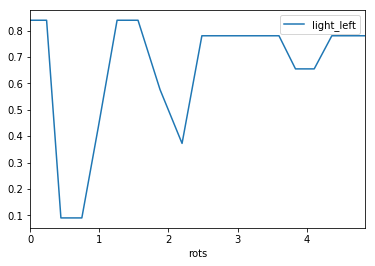

In [7]:
data['light'].plot(x='rots',y='light_left');